In [33]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np

threadcnts = [32,64,1024,4096,8192,16384]
lg_fptf_s = [0,2,5,7,9]

In [34]:
datasets = []
for lg_fptf in lg_fptf_s:
    dataset = []
    for threadcnt in threadcnts:
        p = subprocess.run(["./build/xorSync", str(lg_fptf), str(threadcnt)], capture_output=True)
        print(p.stderr.decode('utf-8'))
        res = p.stdout.decode('utf-8')[:-1].split(",")
        dataset.append((float(res[0]), float(res[1])))
    datasets.append(dataset)

with open("datasets.txt", 'w') as f:
    f.write(str(datasets))
    f.write("\n")

# max fibers per thread: 31
# threads: 32

# max fibers per thread: 31
# threads: 64

# max fibers per thread: 31
# threads: 1024

# max fibers per thread: 31
# threads: 4096

# max fibers per thread: 31
# threads: 8192

# max fibers per thread: 31
# threads: 16384

# max fibers per thread: 124
# threads: 32

# max fibers per thread: 124
# threads: 64

# max fibers per thread: 124
# threads: 1024

# max fibers per thread: 124
# threads: 4096

# max fibers per thread: 124
# threads: 8192

# max fibers per thread: 124
# threads: 16384

# max fibers per thread: 992
# threads: 32

# max fibers per thread: 992
# threads: 64

# max fibers per thread: 992
# threads: 1024

# max fibers per thread: 992
# threads: 4096

# max fibers per thread: 992
# threads: 8192

# max fibers per thread: 992
# threads: 16384

# max fibers per thread: 3968
# threads: 32

# max fibers per thread: 3968
# threads: 64

# max fibers per thread: 3968
# threads: 1024

# max fibers per thread: 3968
# threads: 4096

# m

In [ ]:
import math
def sync_rate_plot(graph):
    def yep(): 
        raise ValueError("expected sync or nosync")
    idx = 0 if graph == "nosync" else (1 if graph == "sync" else yep())
    try: 
        # Define a closure function to register as a callback
        def convert_rate_to_hz(ax):
            """
            Update second axis according to first axis.
            """
            y1, y2 = ax.get_ylim()
            ax_c.set_ylim(y1/datasets[0][idx]*1000, y2/datasets[0][idx]*1000)
            ax_c.figure.canvas.draw()

        fig, ax_f = plt.subplots()
        ax_c = ax_f.twinx()

        # automatically update ylim of ax2 when ylim of ax1 changes.
        ax_f.callbacks.connect("ylim_changed", convert_rate_to_hz)
        for i, dataset in enumerate(datasets):
            fpt_max = (31 * (1 << lg_fptf_s[i])) + 1
            ax_f.plot(np.array(threadcnts)/32, list(map(lambda x: dataset[0][idx]/x[idx] * fpt_max, dataset)), label=f"FPT MAX: {fpt_max}")
        ax_f.set_xlabel("Block Count (#threads=32)")
        ax_f.set_title(graph)

        ax_f.set_ylabel('Rate (normalized) per FPT_MAX')
        ax_c.set_ylabel('Rate (Hz) per FPT_MAX')

        fig.legend()
        fig.savefig(f"tsync_{graph}.png")
    except ValueError:
        # matplotlib is an idiot
        pass

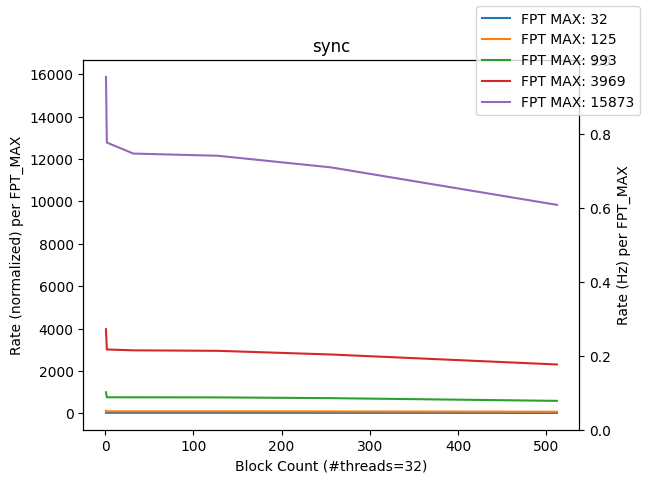

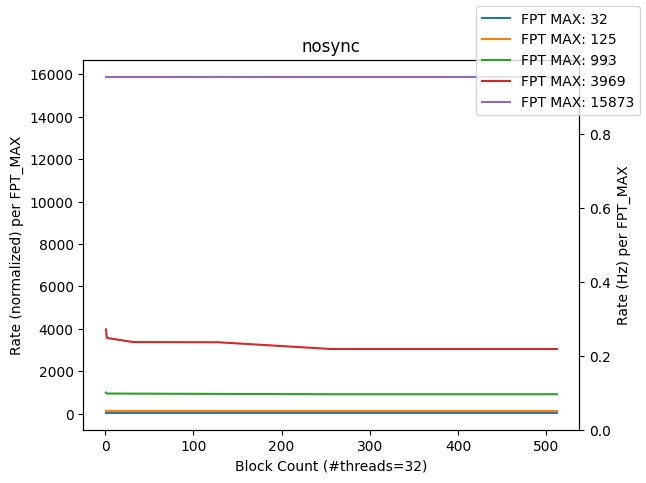

In [38]:
sync_rate_plot("sync")
sync_rate_plot("nosync")

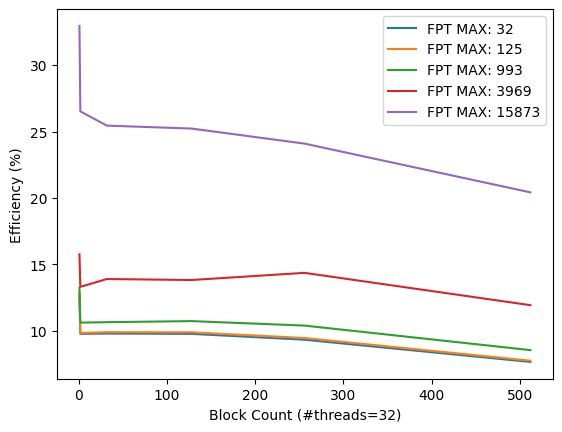

In [41]:
for i, dataset in enumerate(datasets):
    fpt_max = (31 * (1 << lg_fptf_s[i])) + 1
    plt.plot(np.array(threadcnts)/32, list(map(lambda x: x[0]/x[1] * 100, dataset)), label=f"FPT MAX: {fpt_max}")
plt.xlabel("Block Count (#threads=32)")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.savefig("efficiency.png")
plt.show()